In [1]:
# Author : Geethu Thottungal Harilal
# Date   : 01-01-2024
# Aim    : Predict house price data 
# Method : Linear Regression

### Imports

In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# we can use the following line of code for displayimg all columns if the feature set is large
# pd.set_option('display.max_columns',None)

### Data Loading

In [4]:
data = pd.read_csv('housing.csv')

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.shape

(20640, 10)

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Based on above information, we have around 200 missing values for the feature 'total_bedrooms' and we need to deal with the missing values first.

### Preprocessing

In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


now all features has same number of entries without any missing values

### Train Test Split

In [11]:
X = data.drop('median_house_value',axis=1) # input features
y = data['median_house_value'] # target feature

In [12]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Data Exploration of train data

In [14]:
train_data = X_train.join(y_train)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5811,-118.26,34.13,37.0,1383.0,470.0,1185.0,451.0,2.5000,<1H OCEAN,207100.0
18444,-121.81,37.25,5.0,1975.0,520.0,861.0,440.0,4.4565,<1H OCEAN,159000.0
5928,-117.80,34.10,13.0,2996.0,495.0,1187.0,464.0,6.2456,INLAND,161700.0
15955,-122.45,37.71,52.0,1658.0,322.0,1086.0,326.0,3.8583,NEAR OCEAN,261600.0
9008,-118.60,34.08,40.0,866.0,181.0,399.0,176.0,6.9100,<1H OCEAN,380000.0
...,...,...,...,...,...,...,...,...,...,...
5757,-118.28,34.18,50.0,2195.0,336.0,878.0,309.0,6.8840,<1H OCEAN,365600.0
8093,-118.21,33.82,45.0,455.0,92.0,394.0,89.0,4.9562,NEAR OCEAN,165700.0
17914,-121.99,37.36,32.0,1754.0,324.0,917.0,330.0,4.6761,<1H OCEAN,298300.0
18103,-122.04,37.30,25.0,2366.0,417.0,1076.0,398.0,6.9238,<1H OCEAN,345900.0


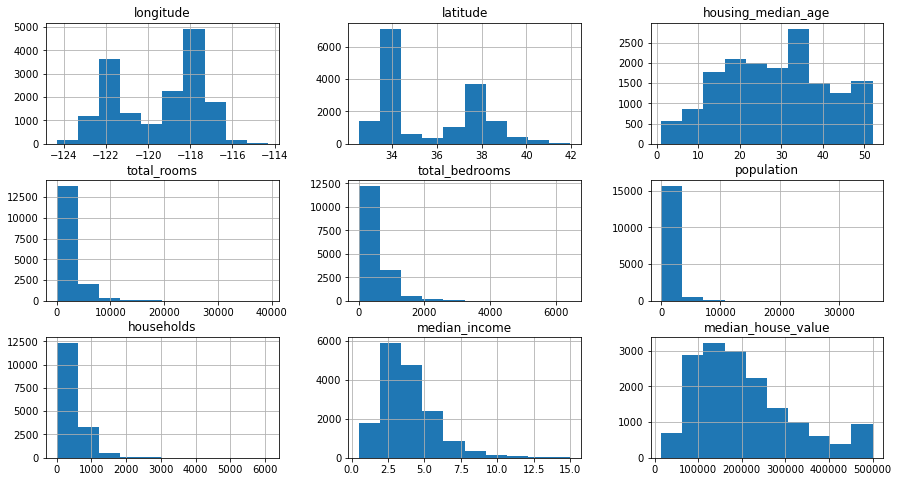

In [16]:
train_data.hist(figsize=(15,8));

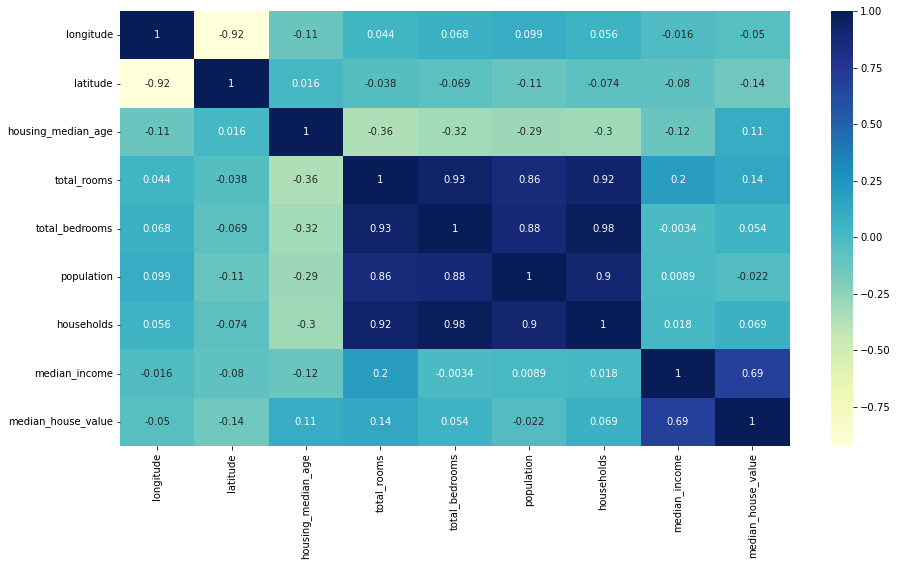

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu');

Based on the heatmap:
* meadian_income feature is strongly correlated to the target feature 
* The dataset shows a strong positive and negative collinearity between some input features such as long and lat values has stong negative correlation whareas total_rooms and total_bedrooms has high positive correlation

Based on the histogram:
* the features total_rooms, total_bedrooms, population and households are right-skewed and not in a bell shaped curve.

In [18]:
# we can check if the log conversion of these features make them normal distribution or not
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

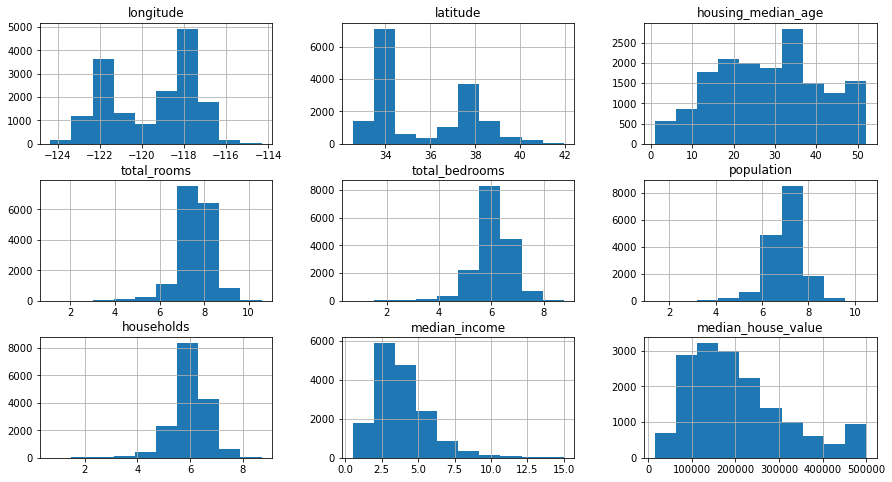

In [19]:
train_data.hist(figsize=(15,8));

now most of the data in normal distribution

Next, we can check the categorical features.

In [20]:
# now replace the categorical feature ocean_proximity with numerical values
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop('ocean_proximity',axis=1)

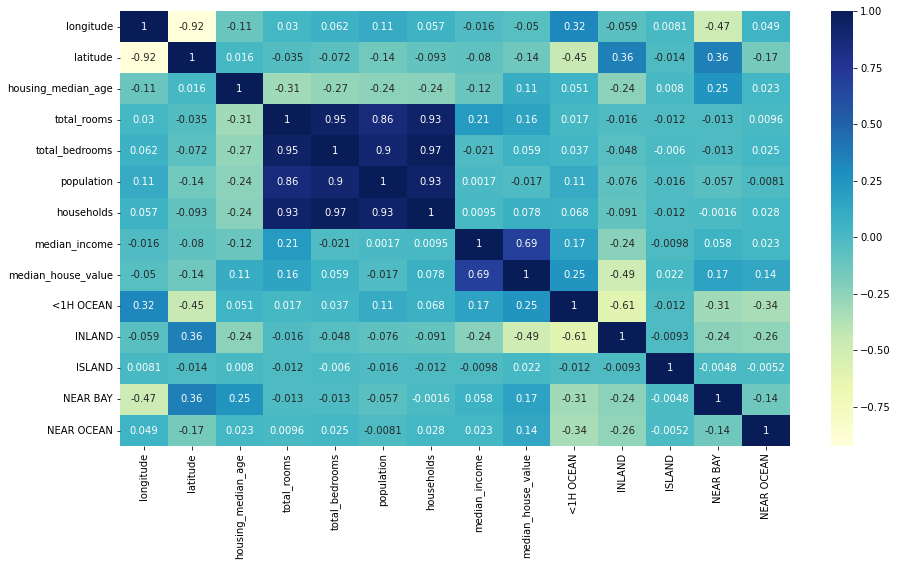

In [21]:
# now we can check the correlation again
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu');

It can be seen that:
* INLAND has a negative correlation with target variable. ie if you are in INLAND, you will pay less house value.
* <1H OCEAN has a positive correlation with target variable. 
Now we have a bunch of useful features to our dataset

now we can visualise some interesting things

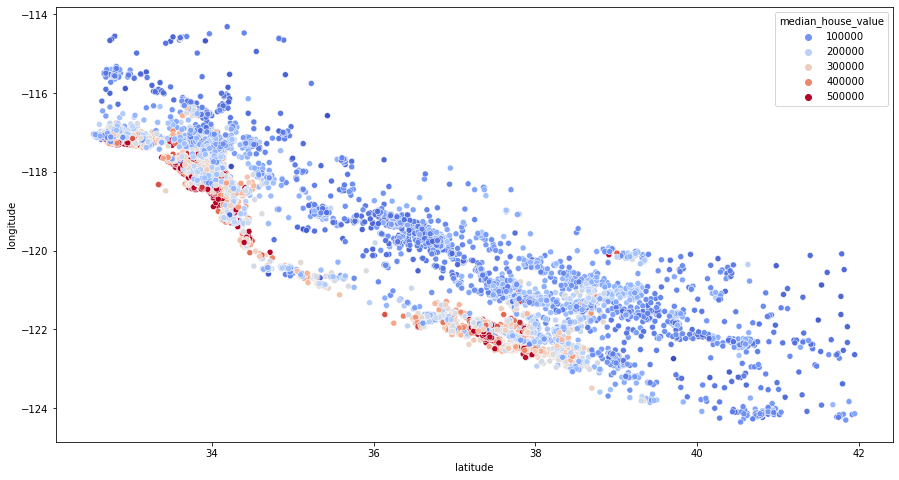

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=train_data['latitude'], y=train_data['longitude'],hue=train_data['median_house_value'],palette='coolwarm');

We can see that:
   * The red indicate high house value region and blue indicate the low house value region. 
   * So from heatmap, we have seen that the INLAND places has low house prices and the blue dots can be the INPLACE regions
   * Most the houses near to the ocean (marked as red) are more expensive

### Feature Engineering

If we check the features like total_bedrooms and households, they actually has no much impact on the house value. So we can try to find useful features from them.

In [25]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_ratio'] = train_data['total_rooms']/train_data['households']

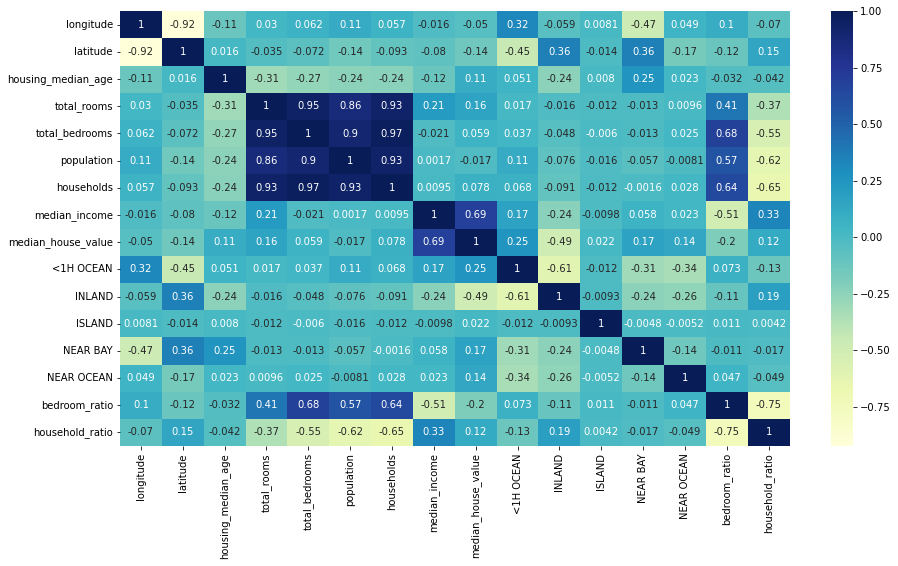

In [26]:
# now we can check the correlation again
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu');

* The bedroom_ratio has more impact on the house value than the total_bedrooms
* Similarly, household_ratio has more significant on the house value than the households

### Reassign Train test data

In [27]:
# train data
X_train, y_train = train_data.drop('median_house_value',axis=1), train_data['median_house_value']

In [28]:
# repeat all steps done for test data
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop('ocean_proximity',axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_ratio'] = test_data['total_rooms']/test_data['households']

X_test, y_test = test_data.drop('median_house_value',axis=1), test_data['median_house_value']

### Modelling

In [29]:
lr_model = LinearRegression()

In [30]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_predict = lr_model.predict(X_test)

In [32]:
train_predict = lr_model.predict(X_train)

### Checking accuracy

#### train accuracy

In [36]:
lr_model.score(X_train,y_train)

0.6722962603472207

#### test accuracy

In [40]:
lr_model.score(X_test,y_test)

0.6652349003168567

This model is not too better fit.